In [25]:
import pandas as pd
import pandapower as pp
import pandapower.networks as ppnets
import pandapower.plotting as plt
import matplotlib.pyplot as mplt

In [26]:
net = ppnets.case14()

In [34]:
net.trafo

,name,std_type,hv_bus,lv_bus,sn_mva,vn_hv_kv,vn_lv_kv,vk_percent,vkr_percent,pfe_kw,...,tap_min,tap_max,tap_step_percent,tap_step_degree,tap_pos,parallel,df,in_service,max_loading_percent,tap_changer_type
0,None,None,3,6,9900.0,135.0,14.000,2070.288,0.0,0.0,...,NaN,NaN,2.2,NaN,-1.0,1,1.0,True,100.0,Ratio
1,None,None,3,8,9900.0,135.0,0.208,5506.182,0.0,0.0,...,NaN,NaN,3.1,NaN,-1.0,1,1.0,True,100.0,Ratio
2,None,None,4,5,9900.0,135.0,0.208,2494.998,0.0,0.0,...,NaN,NaN,6.8,NaN,-1.0,1,1.0,True,100.0,Ratio
3,None,None,6,7,9900.0,14.0,12.000,1743.885,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1,1.0,True,100.0,None
4,None,None,6,8,9900.0,14.0,0.208,1089.099,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1,1.0,True,100.0,None


In [28]:
net.ext_grid['in_service']=False

In [29]:
net.load.scaling = 1.5

In [30]:
net.gen['vm_pu']=1.045

In [31]:
net.gen.loc[0,'p_mw'] = 120
net.gen.loc[1,'p_mw'] = 100
net.gen.loc[2,'p_mw'] = 100
net.gen.loc[3,'slack'] = True

In [32]:
net.gen.loc[0,'slack_weight'] = -40
net.gen.loc[1,'slack_weight'] = 0
net.gen.loc[2,'slack_weight'] = -6
net.gen.loc[3,'slack_weight'] = -6

In [33]:
net.

AttributeError: 'pandapowerNet' instance has no attribute 'transformer'

In [ ]:
print(net["bus"].index.tolist())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [ ]:
pp.runpp(net,numba=False)

In [ ]:
gen_mw_total = net.res_gen['p_mw'].sum()
imports_mw_total = net.res_ext_grid['p_mw'].sum()

print('total gen MW :', gen_mw_total + imports_mw_total)
print('total imported gen MW :', imports_mw_total)
print('total local gen MW:', gen_mw_total)
print('total load MW:', net.res_load['p_mw'].sum())

total gen MW : 392.01125787131866
total imported gen MW : 0.0
total local gen MW: 392.01125787131866
total load MW: 388.50000000000006


In [ ]:
net.gen

,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,slack_weight,type,controllable,max_p_mw,min_p_mw
0,None,1,120.0,1.045,NaN,-40.0,50.0,1.0,False,True,-40.0,None,True,140.0,0.0
1,None,2,100.0,1.045,NaN,0.0,40.0,1.0,False,True,0.0,None,True,100.0,0.0
2,None,5,100.0,1.045,NaN,-6.0,24.0,1.0,False,True,-6.0,None,True,100.0,0.0
3,None,7,0.0,1.045,NaN,-6.0,24.0,1.0,True,True,-6.0,None,True,100.0,0.0


In [ ]:
net.res_gen

,p_mw,q_mvar,va_degree,vm_pu
0,120.000000,16.018684,-6.977821,1.045
1,100.000000,51.092046,-10.625264,1.045
2,100.000000,8.404639,-6.106943,1.045
3,72.011258,15.023973,0.000000,1.045


In [ ]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.042595,-7.301640,0.000000,0.000000
1,1.045000,-6.977821,-87.450000,3.031316
2,1.045000,-10.625264,41.300000,-22.592046
3,1.023235,-9.260606,71.700000,-5.850000
4,1.023862,-8.394129,11.400000,2.400000
5,1.045000,-6.106943,-83.200000,2.845361
6,1.026875,-6.788732,0.000000,0.000000
7,1.045000,0.000000,-72.011258,-15.023973
8,1.011859,-9.814350,44.250000,5.446692
9,1.005330,-9.614624,13.500000,8.700000


In [ ]:
lines = net.line.index
critical_lines = []
critical_lines_indx = []

vmax = 1.05
vmin = 0.95
line_loading_max = 100

for l in lines:
    net.line.loc[l, 'in_service'] = False
    pp.runpp(net, numba=False)
    if net.res_bus.vm_pu.max()>vmax:
        critical_lines.append([l, 'hv'])
        critical_lines_indx.append(l)
    if net.res_bus.vm_pu.min() < vmin:
        critical_lines.append([l, 'lv'])
        critical_lines_indx.append(l)
    if net.res_line.loading_percent.max() > line_loading_max:
        critical_lines.append([l, 'ol'])
        critical_lines_indx.append(l)
    net.line.loc[l, 'in_service'] = True



In [ ]:
print(critical_lines)

[[9, 'lv'], [11, 'lv']]

[[9, 'lv'], [11, 'lv']]


[[9, 'lv'], [11, 'lv']]

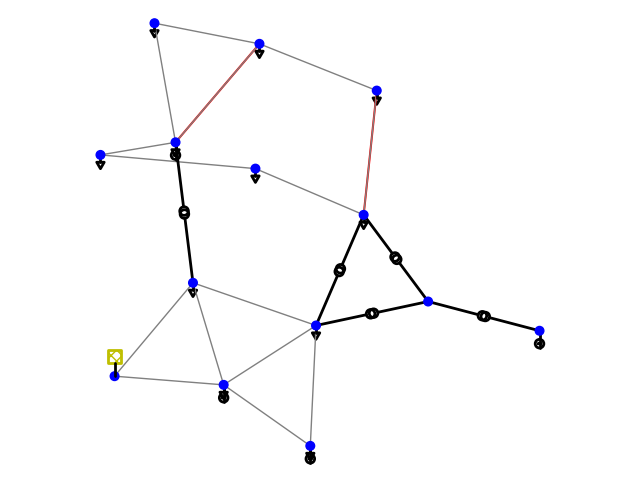

In [ ]:
fig, ax = mplt.subplots()
fig.set_figheight(6)
fig.set_figwidth(8)

critical_lc = plt.create_line_collection(net, critical_lines_indx, color="r", zorder=2) #create lines

plt.draw_collections([critical_lc], ax=ax);
plt.simple_plot(net,  plot_loads=True, plot_gens=True,  ax=ax, show_plot=False);

mplt.show()